In [4]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import collections
import seaborn as sns       # package for better viewing of networks
import operator 
from networkx.algorithms import *     
from networkx.algorithms.community import * 
from networkx import community
from networkx.algorithms import community  #package for girvan_newman

import re
import community     #from package python-louvain

/Users/iris/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


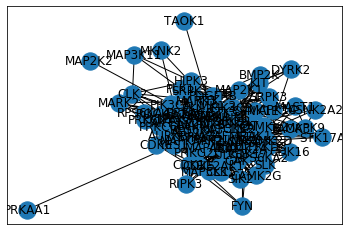

In [5]:
# Import modules for building edge weighted networks
from EdgeWeightedNetworkBuilding import build_network_from_excel, build_network_from_df  

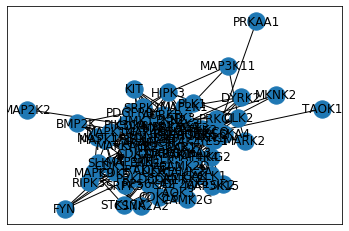

In [6]:
df_getNetwork = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="MCF7", sheet_name = "zScorenodes.edges", threshold = 0.2)
cell_line = "MCF7"

In [5]:
'''Next Cells Calculate Network Communities Using Different Algorithms'''
# Louvain
partition = community.best_partition(df_getNetwork, resolution=1.2)
print ("Louvain Modularity: ", community.modularity(partition, df_getNetwork))
print ("Louvain Partition: ", partition)

Louvain Modularity:  0.2774088267071883
Louvain Partition:  {'ABL1': 0, 'AKT1': 1, 'ARAF': 0, 'CDK1': 2, 'CDK5': 2, 'CIT': 2, 'EIF2AK1': 2, 'ERN1': 2, 'IRAK1': 2, 'LATS1': 1, 'MAP4K5': 0, 'MAPKAPK2': 0, 'MINK1': 0, 'MTOR': 0, 'PAK4': 1, 'PDGFRB': 0, 'PIK3CA': 0, 'PIK3CB': 0, 'PRKACA': 1, 'PRKACB': 1, 'ROCK1.2': 1, 'SRPK1': 0, 'TTK': 3, 'ULK1': 2, 'ABL2': 2, 'CAMK2D': 2, 'CDK4': 2, 'CLK1': 2, 'GAK': 2, 'MAP3K15': 2, 'MAP3K3': 2, 'PAK1': 1, 'PAK2': 0, 'PHKG2': 1, 'PRKD3': 2, 'RPS6KA2': 3, 'RPS6KA3': 1, 'AKT3': 1, 'CLK2': 1, 'CSNK1E': 2, 'HIPK3': 0, 'KIT': 0, 'MAP3K1': 1, 'MAP4K4': 2, 'MAPK14': 0, 'PAK3': 1, 'PKN1': 1, 'PLK1': 3, 'PRKCQ': 1, 'RPS6KB1': 3, 'SRPK3': 1, 'STK4': 1, 'TNK2': 0, 'YES1': 1, 'PRKCI': 1, 'RPS6KA4': 1, 'AURKB': 0, 'CAMK2A': 2, 'CDK2': 2, 'CDK9': 1, 'LIMK1.2': 0, 'MAPK1.3': 2, 'MARK3': 0, 'PKN2': 0, 'RIPK3': 2, 'SLK': 0, 'STK3': 3, 'BMP2K': 2, 'CDK16': 2, 'CDK17': 2, 'MELK': 2, 'SIK2': 2, 'DYRK2': 3, 'MAST1': 0, 'CAMK2G': 2, 'CAMKK2': 3, 'STK17A': 3, 'CDK6': 2, 'FYN'

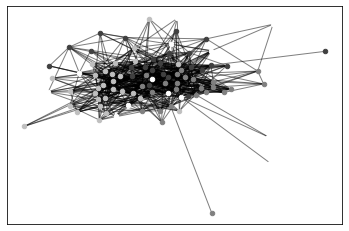

In [6]:
# Drawing Louvain
size = float(len(set(partition.values())))
pos = nx.spring_layout(df_getNetwork)
count = 0.
for com in set(partition.values()) :
    count += 1.
    list_nodes = [nodes for nodes in partition.keys()
        if partition[nodes] == com]
    nx.draw_networkx_nodes(df_getNetwork, pos, list_nodes, node_size = 20,
        node_color = str(count / size))
nx.draw_networkx_edges(df_getNetwork, pos, alpha=0.5)
plt.show()

In [7]:
# Girvan_newman
from networkx.algorithms import community
communities_generator = community.girvan_newman(df_getNetwork)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['ABL1',
  'ABL2',
  'AKT1',
  'AKT3',
  'ARAF',
  'AURKB',
  'BMP2K',
  'CAMK2A',
  'CAMK2D',
  'CAMK2G',
  'CAMKK2',
  'CDK1',
  'CDK16',
  'CDK17',
  'CDK2',
  'CDK4',
  'CDK5',
  'CDK6',
  'CDK9',
  'CIT',
  'CLK1',
  'CLK2',
  'CSNK1E',
  'CSNK2A2',
  'DYRK2',
  'EIF2AK1',
  'ERN1',
  'FYN',
  'GAK',
  'HIPK3',
  'IRAK1',
  'KIT',
  'LATS1',
  'LIMK1.2',
  'MAP2K1',
  'MAP3K1',
  'MAP3K11',
  'MAP3K15',
  'MAP3K3',
  'MAP4K4',
  'MAP4K5',
  'MAPK1.3',
  'MAPK14',
  'MAPK9',
  'MAPKAPK2',
  'MARK2',
  'MARK3',
  'MAST1',
  'MELK',
  'MINK1',
  'MKNK2',
  'MTOR',
  'PAK1',
  'PAK2',
  'PAK3',
  'PAK4',
  'PDGFRB',
  'PHKG2',
  'PIK3CA',
  'PIK3CB',
  'PKN1',
  'PKN2',
  'PLK1',
  'PRKAA1',
  'PRKACA',
  'PRKACB',
  'PRKCI',
  'PRKCQ',
  'PRKD3',
  'RIPK3',
  'ROCK1.2',
  'RPS6KA2',
  'RPS6KA3',
  'RPS6KA4',
  'RPS6KB1',
  'SIK2',
  'SLK',
  'SRPK1',
  'SRPK3',
  'STK17A',
  'STK3',
  'STK4',
  'TAOK3',
  'TNK2',
  'TTK',
  'TYK2',
  'ULK1',
  'YES1'],
 ['MAP2K2'],
 ['TAOK1']]

In [8]:
# Bipartitions
Kernighan_Lin = kernighan_lin_bisection(df_getNetwork, partition=None, max_iter=100, seed=None)
Kernighan_Lin

({'ABL2',
  'AKT1',
  'AKT3',
  'CAMK2A',
  'CAMK2D',
  'CAMK2G',
  'CAMKK2',
  'CDK16',
  'CDK17',
  'CDK2',
  'CDK4',
  'CDK9',
  'CLK1',
  'CSNK1E',
  'EIF2AK1',
  'ERN1',
  'GAK',
  'IRAK1',
  'MAP3K15',
  'MAP3K3',
  'MAP4K4',
  'MELK',
  'PAK1',
  'PAK2',
  'PAK3',
  'PAK4',
  'PHKG2',
  'PKN1',
  'PRKCI',
  'PRKCQ',
  'PRKD3',
  'ROCK1.2',
  'RPS6KA2',
  'RPS6KA3',
  'RPS6KA4',
  'RPS6KB1',
  'SIK2',
  'SLK',
  'STK3',
  'STK4',
  'TAOK3',
  'TNK2',
  'TYK2',
  'ULK1',
  'YES1'},
 {'ABL1',
  'ARAF',
  'AURKB',
  'BMP2K',
  'CDK1',
  'CDK5',
  'CDK6',
  'CIT',
  'CLK2',
  'CSNK2A2',
  'DYRK2',
  'FYN',
  'HIPK3',
  'KIT',
  'LATS1',
  'LIMK1.2',
  'MAP2K1',
  'MAP2K2',
  'MAP3K1',
  'MAP3K11',
  'MAP4K5',
  'MAPK1.3',
  'MAPK14',
  'MAPK9',
  'MAPKAPK2',
  'MARK2',
  'MARK3',
  'MAST1',
  'MINK1',
  'MKNK2',
  'MTOR',
  'PDGFRB',
  'PIK3CA',
  'PIK3CB',
  'PKN2',
  'PLK1',
  'PRKAA1',
  'PRKACA',
  'PRKACB',
  'RIPK3',
  'SRPK1',
  'SRPK3',
  'STK17A',
  'TAOK1',
  'TTK'})

In [9]:
# Modularity-based communities
Modularity_based = greedy_modularity_communities(df_getNetwork)
Modularity_based

[frozenset({'BMP2K',
            'CAMK2G',
            'CAMKK2',
            'CDK1',
            'CDK16',
            'CDK17',
            'CDK2',
            'CDK4',
            'CDK5',
            'CDK6',
            'CDK9',
            'CIT',
            'CSNK1E',
            'CSNK2A2',
            'ERN1',
            'FYN',
            'IRAK1',
            'MAP3K3',
            'MAPK1.3',
            'MAPK9',
            'MAST1',
            'PIK3CB',
            'PRKD3',
            'RIPK3',
            'SRPK3',
            'STK17A',
            'TAOK3',
            'ULK1'}),
 frozenset({'ABL1',
            'AKT1',
            'AKT3',
            'CLK2',
            'HIPK3',
            'LATS1',
            'LIMK1.2',
            'MAP2K2',
            'MAP3K11',
            'MAP4K5',
            'MAPKAPK2',
            'MARK2',
            'MARK3',
            'MTOR',
            'PAK4',
            'PIK3CA',
            'PKN1',
            'PLK1',
            'PRKACA',
          

In [7]:
# k_clique
def k_clique_communities(G, k, cliques=None):
    K5 = nx.convert_node_labels_to_integers(G,first_label=2)
    df_getNetwork.add_edges_from(K5.edges())
    c = list(k_clique_communities(G, 4))
    sorted(list(c[0]))
    list(k_clique_communities(G, 10))
    if k < 2:
        raise nx.NetworkXError("k=%d, k must be greater than 1." % k)
    if cliques is None:
        cliques = nx.find_cliques(G)
    cliques = [frozenset(c) for c in cliques if len(c) >= k]

    # First index which nodes are in which cliques
    membership_dict = defaultdict(list)
    for clique in cliques:
        for node in clique:
            membership_dict[node].append(clique)

    # For each clique, see which adjacent cliques percolate
    perc_graph = nx.Graph()
    perc_graph.add_nodes_from(cliques)
    for clique in cliques:
        for adj_clique in _get_adjacent_cliques(clique, membership_dict):
            if len(clique.intersection(adj_clique)) >= (k - 1):
                perc_graph.add_edge(clique, adj_clique)

    # Connected components of clique graph with perc edges
    # are the percolated cliques
    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))


def _get_adjacent_cliques(clique, membership_dict):
    adjacent_cliques = set()
    for n in clique:
        for adj_clique in membership_dict[n]:
            if clique != adj_clique:
                adjacent_cliques.add(adj_clique)
    return adjacent_cliques

In [8]:
k_clique = [k_clique_communities(df_getNetwork,10)]
k_clique = list(k_clique)
print (k_clique)

#c = list(nx.k_clique_communities(df_getNetwork, 4))
#print list(k_clique[1])

[<generator object k_clique_communities at 0x1a1d86cde0>]


In [9]:
# Test k_clique
g=nx.gnm_random_graph(5,5)
k_clique = [k_clique_communities(g,10)]
k_clique = list(k_clique)
print (k_clique)

[<generator object k_clique_communities at 0x1a1d8a9408>]


In [15]:
# Save k_clique
with open("test111.txt","w") as f:
    for item in k_clique:
        f.write("%s\n" % item)